# Solution Exponential Integrate and Fire Neuron

first name: __Dylan__

last name: __Bourgeois__

sciper: 224797

date: 19/03/2017

*Your teammate*

first name of your teammate: __Tristan__

last name of your teammate: __Besson__

sciper of your teammate: 225524


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.


** Submission **

Rename this notebook to Ex3_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

<http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html>

In [295]:
import numpy as np

## Exercise 3, getting started

nr of spikes: 7


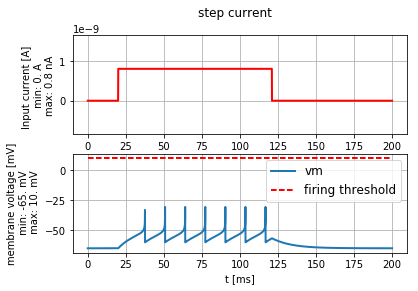

In [296]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory


input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 3.1 Rehobase Threshold

> Modify the code example given above: Call simulate_exponential_IF_neuron() and set the function parameter v_spike=+10mV (which overrides the default value -30mV). What do you expect to happen? How many spikes will be generated?

The Exponential Integrate and Fire is given by equation (5.6) of the book  :

(1) $$ \tau \frac{du}{dt} = -(u-u_{rest}) + \Delta_T . exp^{\frac{u-v_{rh}}{\Delta_T}} + R.I $$

Which yields the following solution (2) : $u(t) = u_{rest} + RI. (1-\exp^{-\frac{(t-t_0)}{\tau}})$

To get the interval between two spikes we solve (2) for T with $u(T) = v_{spike}$ and $t_0 = 0$ yields :

$$T=\tau . ln(\frac{RI_{rh}}{RI_{rh} - (u(T) - v_{rest})})$$

In [297]:
V_rh = exp_IF.MEMBRANE_RESISTANCE_R * I_rh
T = exp_IF.MEMBRANE_TIME_SCALE_tau * np.log((V_rh + (exp_IF.FIRING_THRESHOLD_v_spike - exp_IF.V_REST))/V_rh)
print(T)

25.68079396 ms


In [298]:
print("Expected number of spikes (rounded) : {}".format(np.round((200 * b2.ms)/T)))

Expected number of spikes (rounded) : 8.0


In [299]:
exp_IF.FIRING_THRESHOLD_v_spike = 10 * b2.mvolt

> Compute the minimal amplitude I_rh of a constant input current such that the neuron will elicit a spike

The minimal amplitude is given by finding the fixed point of ```f(u)``` or in other words finding the zeros of ```du/dt```. We know this fixed point is at ```v_rh``` (function parameter : ```exp_IF.RHEOBASE_THRESHOLD_v_rh```), which gives us the constant current : 

$$
I_{rh}^{min} = \frac{(v_{rh} - v_{rest} - \Delta_T)}{R_{membrane}}
$$

Note that ```v_rh - v_rest = v_spike``` as set in question 3.1.1.a (v_spike = +10mV)

The rheobase current is given by the same relation without the sharpness $\Delta_T$. We get simply :

$$
I_{rh} = \frac{(v_{rh} - v_{rest})}{R_{membrane}}
$$

In [300]:
import brian2 as b2
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF

I_rh = (exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST) / exp_IF.MEMBRANE_RESISTANCE_R
print(I_rh)

0.5 nA


In [301]:
I_rh_min = (exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST - exp_IF.SHARPNESS_delta_T) / exp_IF.MEMBRANE_RESISTANCE_R
print(I_rh_min)

0.4 nA


nr of spikes: 0


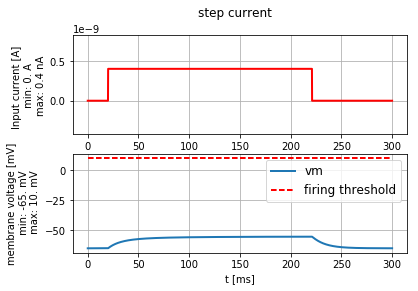

In [302]:
% matplotlib inline
from neurodynex.tools import plot_tools, input_factory

# code here: 
# inject a current for 200ms. Set the maximal amplitude such that the neuron does NOT spike.
# plot the current and the voltage.
input_current = input_factory.get_step_current(
    t_start=20, t_end=220, unit_time=b2.ms, amplitude=I_rh_min)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=300*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

print("nr of spikes: {}".format(spike_monitor.count[0]))

> Modify the code given above and inject a current of amplitude I_rh and 300 ms duration into the expIF neuron.

nr of spikes: 8


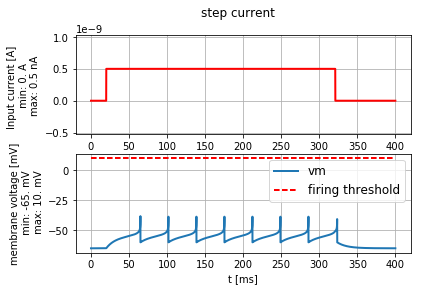

In [303]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=I_rh)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=400*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

print("nr of spikes: {}".format(spike_monitor.count[0]))

## 3.2 Strength - Duration Curve

nr of spikes: 1


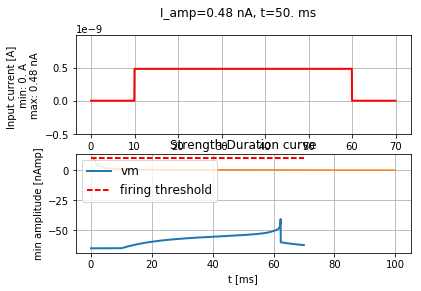

In [304]:
# i = 6 yields no spikes
# => i(min_amp) = 5
i=5 
durations = [1,   2,    5,  10,   20,   50, 100]
# min_amp = 0.48 nA (this makes sense as it is ~ I_rh)
min_amp =   [8.84, 4.42, 1.77, 1.10, 0.70, 0.48, 0.24]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

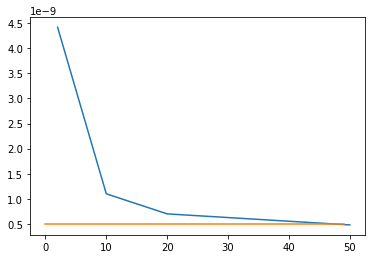

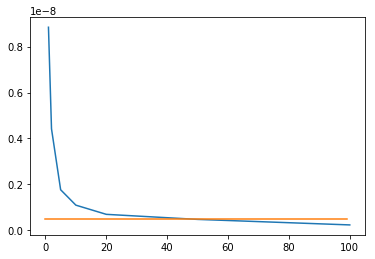

In [305]:
##
# The code shown below gives an indication of the solving method : 
# We start by plotting the behaviour of known minimal currents and minimal durations.
# We can then fit this behaviour to estimate the missing values (assuming a linear fit between points)

known_durations = [2, 10, 20, 50]
known_min_amp = [4.42 * b2.namp, 1.10* b2.namp, .70* b2.namp, .48* b2.namp]

plt.plot(known_durations, known_min_amp)
plt.plot([I_rh]*50) # rheobase
plt.show()

# PLot again to check fit
plt.plot(durations, min_amp * b2.namp)
plt.plot([I_rh]*100) # rheobase
plt.show()

### 3.2 Discussion of the strength-duration curve



## 3.3 Quadratic Integrate and Fire neuron
This exercise is not available online. All information is given here.

### 3.3.1 Read the book chapter about the quadratic integrate and fire neuron
http://neuronaldynamics.epfl.ch/online/Ch5.S3.html

### 3.3.2 Implement the quadratic integrate and fire neuron in Brian2:

* Follow the [source]-link in the documentation to get the Python source code of the exponential integrate and fire neuron. http://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.exponential_integrate_fire.html
* Find the one function that implements the exponential LIF. Copy that function into this notebook. Rename the function, change it's parameters and modify the dynamics from the exponential to the quadratic equation (Equation 5.16 in the book).

The equation $5.16$ in the book gives the quadratic integrate and fire neuron model : 

$$ 
\tau . \frac{du}{dt} = a_0 . (u-u_{rest}) . (u-u_c) + R.I
$$

This is the equation we will implement below. It contains 2 new variables compared to the Exponential Integrate and Fire model shown in 3.1 :

* $a_0$ (denoted as ```A_0``` in the code) : positive constant [$V^{-1}$] 
* $v_c$ (denoted as ```SPIKE_INIT_THRESHOLD_v_crit``` in the code) : critical voltage for spike initiation by a short current pulse [$V$]
* $u_{rest}$ (denoted as ```V_REST``` in the code) : the rest potential (note that this is different from the ```V_REST``` used in the exponential model

In [322]:
# default values. These are the same as the Exponential IF model
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
V_RESET = -60.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

# Custom values for quadratic IF model (see 3.3.4)
A_0 = 1./ (2 * SHARPNESS_delta_T)
V_REST = exp_IF.V_REST
SPIKE_INIT_THRESHOLD_v_crit = RHEOBASE_THRESHOLD_v_rh

# a technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV


def simulate_quadratic_IF_neuron(
        tau=MEMBRANE_TIME_SCALE_tau,
        R=MEMBRANE_RESISTANCE_R,
        v_rest=V_REST,
        v_reset=V_RESET,
        v_rheobase=RHEOBASE_THRESHOLD_v_rh,
        v_spike=FIRING_THRESHOLD_v_spike,
        v_crit=SPIKE_INIT_THRESHOLD_v_crit,
        a_0=A_0,
        delta_T=SHARPNESS_delta_T,
        I_stim=input_factory.get_zero_current(),
        simulation_time=200*b2.ms):
    """
    Implements the dynamics of the quadratic Integrate-and-fire model

    Args:
        tau (Quantity): Membrane time constant
        R (Quantity): Membrane resistance
        v_rest (Quantity): Resting potential
        v_reset (Quantity): Reset value (vm after spike)
        v_rheobase (Quantity): Rheobase threshold
        v_spike (Quantity) : voltage threshold for the spike condition
        v_crit (Quantity) : critical voltage for spike initiation by a short current pulse
        a_0 (Quantity) : Quadratic IF model constant
        delta_T (Quantity): Sharpness of the exponential term
        I_stim (TimedArray): Input current
        simulation_time (Quantity): Duration for which the model is simulated

    Returns:
        (voltage_monitor, spike_monitor):
        A b2.StateMonitor for the variable "v" and a b2.SpikeMonitor
    """

    eqs = """
    dv/dt = (a_0 * (v-v_rest)*(v-v_crit) + R * I_stim(t,i)) / (tau) : volt
    """
    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset", threshold="v>v_spike", method="euler")
    neuron.v = v_rest
    # monitoring membrane potential of neuron and injecting current
    voltage_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)

    # run the simulation
    net = b2.Network(neuron, voltage_monitor, spike_monitor)
    net.run(simulation_time)

    return voltage_monitor, spike_monitor

### 3.3.3 Call your function: 
As above, inject a current into your neuron and plot the response.

nr of spikes: 28


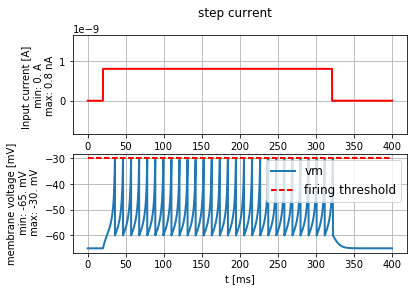

In [323]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = simulate_quadratic_IF_neuron(
    I_stim=input_current, simulation_time=400*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=FIRING_THRESHOLD_v_spike)

print("nr of spikes: {}".format(spike_monitor.count[0]))

### 3.3.4 Approximate the exponential model
* The quadratic model has three parameters: a0, v_rest and vc (note that this v_rest is different from the v_rest of the exponential model). They can be chosen such that the quadratic model approximates the exponential model. Read the box "Example: Approximating the exponential integrate-and-fire" in chapter http://neuronaldynamics.epfl.ch/online/Ch5.S3.html and make sure you understand figure 5.8.
* On paper, find the equations that express the parameters a0, v_rest and vc (in terms of the parameters of the exponential model) such that the two models are matched (in value, slope and curvature) at the rheobase threshold.
* In code, compute the values of a0, v_rest and vc using the values provided in the exp_IF module.

In [324]:
# 3.3.4 Approximate the exponential model (solve it on paper, use the final expressions here)

A_0 = 1. / (2 * exp_IF.SHARPNESS_delta_T)
print(A_0)
V_rest = exp_IF.V_REST
print(V_rest)
V_C = RHEOBASE_THRESHOLD_v_rh  # replace this expression with the correct formula.
print(V_C)

250. m^-2 kg^-1 s^3 A
-65. mV
-55. mV


### 3.3.5 Simulate the quadratic- and the exponential model
* Inject the same current into an exponential- and into your (matched) quadratic model. Set the current duration to 1 second and the amplitude to I_Rh + 0.030 * b2.namp  (I_Rh as computed in exercise 3.1). Simulate for 1 second and plot the voltage responses.

nr of spikes quadratic IF: 60


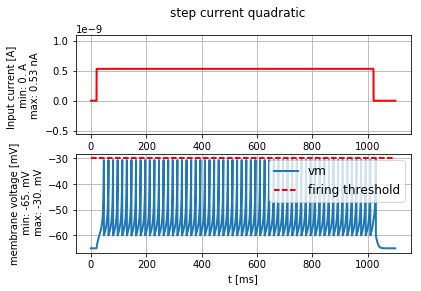

In [325]:
# 3.3.5 Simulate the quadratic- and the exponential model

# Common input current
input_current = input_factory.get_step_current(
    t_start=20, t_end=1020, unit_time=b2.ms, amplitude=I_rh + 0.030 * b2.namp)

## QUADRATIC
state_monitor_quad, spike_monitor_quad = simulate_quadratic_IF_neuron(
    I_stim=input_current, simulation_time=1100*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor_quad, input_current,title="step current quadratic", 
    firing_threshold=FIRING_THRESHOLD_v_spike)

print("nr of spikes quadratic IF: {}".format(spike_monitor_quad.count[0]))

nr of spikes exponential IF: 32


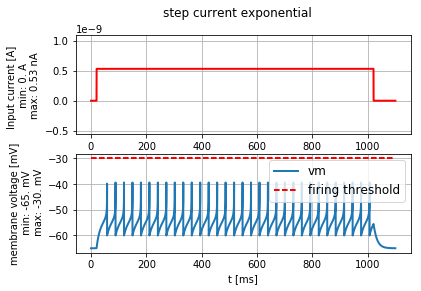

In [326]:
## EXPONENTIAL
state_monitor_exp, spike_monitor_exp = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=1100*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor_exp, input_current,title="step current exponential", 
    firing_threshold=FIRING_THRESHOLD_v_spike)

print("nr of spikes exponential IF: {}".format(spike_monitor_exp.count[0]))

### 3.3.6 Discuss your observation

> Explain your observations here. Qualitatively compare the voltage traces of the exponential- and the quadratic model. Is the number of spikes the same for the two models?

* In terms of amplitude, both models yield similar values (maximum at ```-40 mV``` for the exponential IF, ```-30 mV``` for the quadratic IF (note that this is significantly closer to the firing threshold.
* Both models exhibit the same behaviour for spiking : initially at ```V_rest```, the current step elicits a first spike, which is brought down to ```V_reset``` after the first spike. Since the current is still above the threshold there is another spike that is generated. And this behaviour holds as long as the current is injected.
* There are more spikes given by the quadratic IF than by the exponential IF (nearly twice as many : *60* vs *32*)